# Практическая работа №3

ФИО: *Чан Минь Ханг*

Группа: *ИВБО-07-21*

In [1]:
import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

### 1. Загрузка данных
Загрузить данные из файла “insurance.csv”.

In [2]:
data = pd.read_csv('insurance.csv')

display(data)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 2. Статистика по данным
С помощью метода describe() посмотреть статистику по данным. Сделать 
выводы.

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3. Гистограммы
Построить гистограммы для числовых показателей. Сделать выводы.

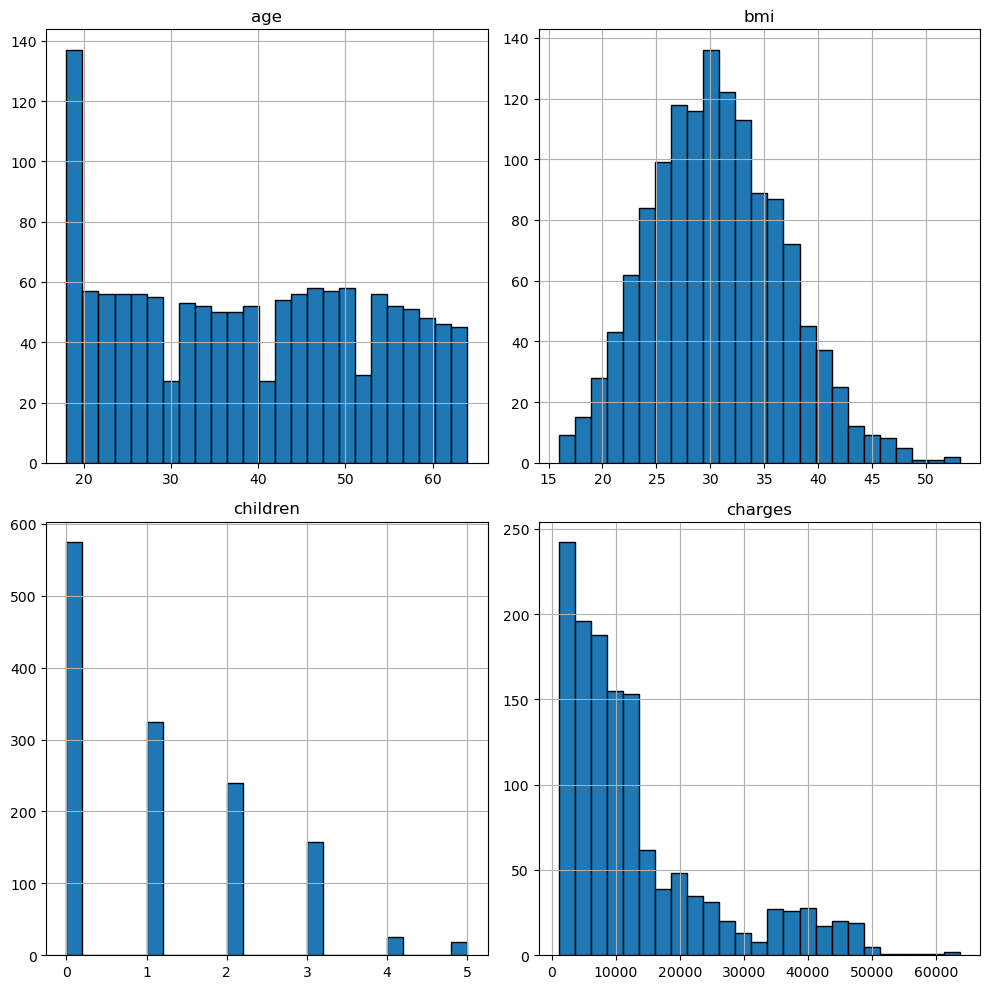

In [4]:
data.hist(bins=25, figsize=(10, 10), edgecolor='black')
plt.tight_layout()
plt.show()

*Можно увидеть, что возврастная выборка равномерно распределена за исключением 18 летних, там наблюдается
сильный перекос. Индекс массы тела имеет схожесть снормальным распределением около 30, по количеству детей
график схож с параболой, которая имеет максимальные значения в 0 и минимальные в 4-5. Расходы схожи с
экспоненциальным графиком.*


### 4. Меры центральной тенденции
Найти меры центральной тенденции и меры разброса для индекса массы 
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на 
гистограммах (3 вертикальные линии). Добавить легенду на графики. 
Сделать выводы.

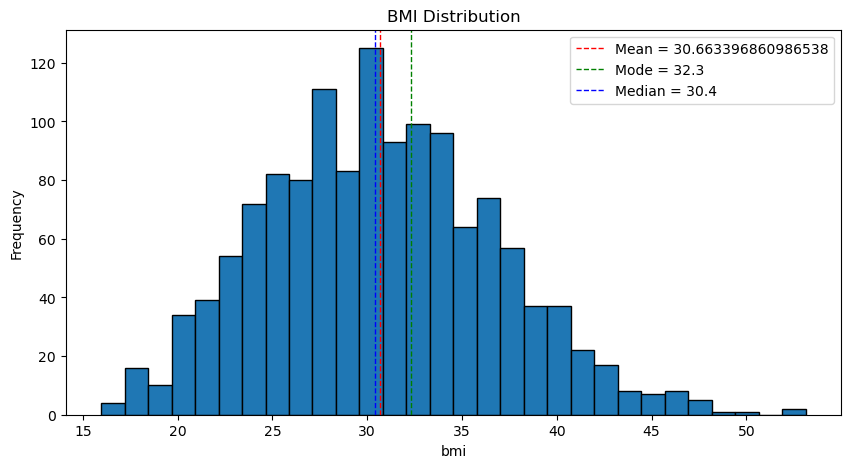

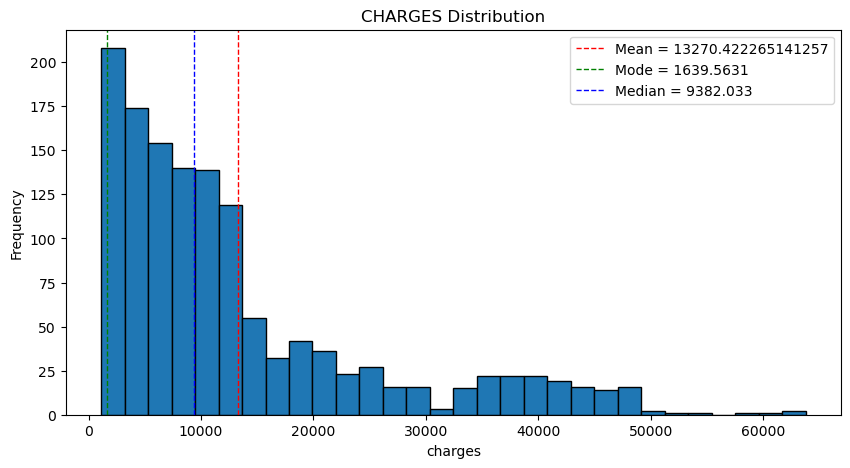

In [5]:
interval = 30

for indicator in ['bmi', 'charges']:
    mean = data[indicator].mean()
    mode = data[indicator].mode().max()
    median = data[indicator].median()
    
    plt.figure(figsize=(10, 5))
    plt.hist(data[indicator], bins=interval, edgecolor="black")
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean = {mean}')
    plt.axvline(mode, color='g', linestyle='dashed', linewidth=1, label=f'Mode = {mode}')
    plt.axvline(median, color='b', linestyle='dashed', linewidth=1, label=f'Median = {median}')
    plt.title(f'{indicator.upper()} Distribution')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [6]:
pd.cut(data['bmi'], interval).mode()

0    (29.589, 30.828]
Name: bmi, dtype: category
Categories (30, interval[float64, right]): [(15.923, 17.199] < (17.199, 18.438] < (18.438, 19.677] < (19.677, 20.916] ... (48.174, 49.413] < (49.413, 50.652] < (50.652, 51.891] < (51.891, 53.13]]

*Данные mode представленны выше. Данные не совсем корректно отображаются из-за того, что график отображет
соседние значения. И выглядит так, что самое повторяющиеся значение по графику не вышлядит, как самое
повторяющиеся.
Просмотрев графики можно увидеть, что значения приблизительно равны.*

### 5. Box-plot 
Построить box-plot для числовых показателей. Названия графиков должны 
соответствовать названиям признаков. Сделать выводы.

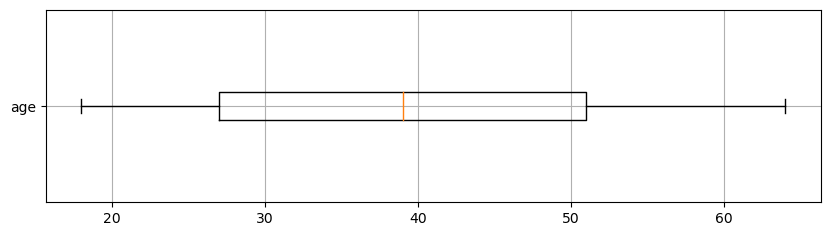

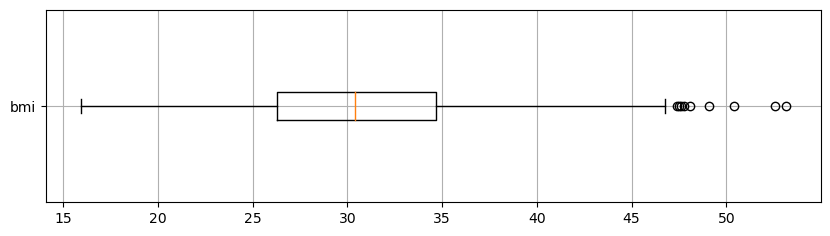

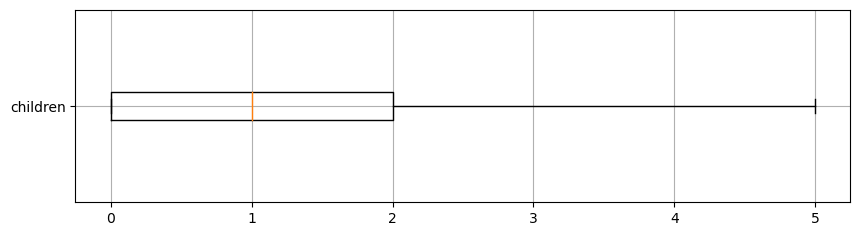

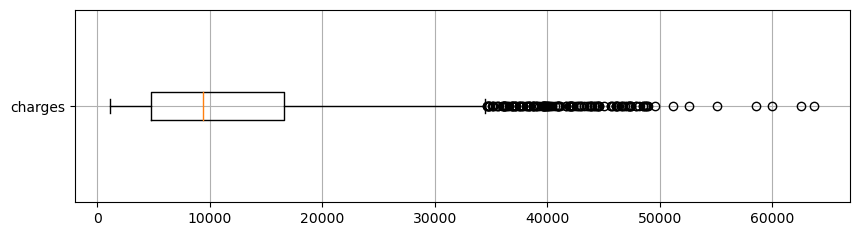

In [7]:
for indicator in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 2.5))
    plt.boxplot(data[indicator], labels=[indicator], vert=False)
    plt.grid()
    plt.show()

*Виден перекос в расходах и массой тела. Особенно явно это видно на расходах.*

### 6. Проверка центральной предельной теоремы

Используя признак charges или imb, проверить, выполняется ли 
центральная предельная теорема. Использовать различные длины выборок 
n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти 
стандартное отклонение и среднее для полученных распределений.
Сделать выводы.

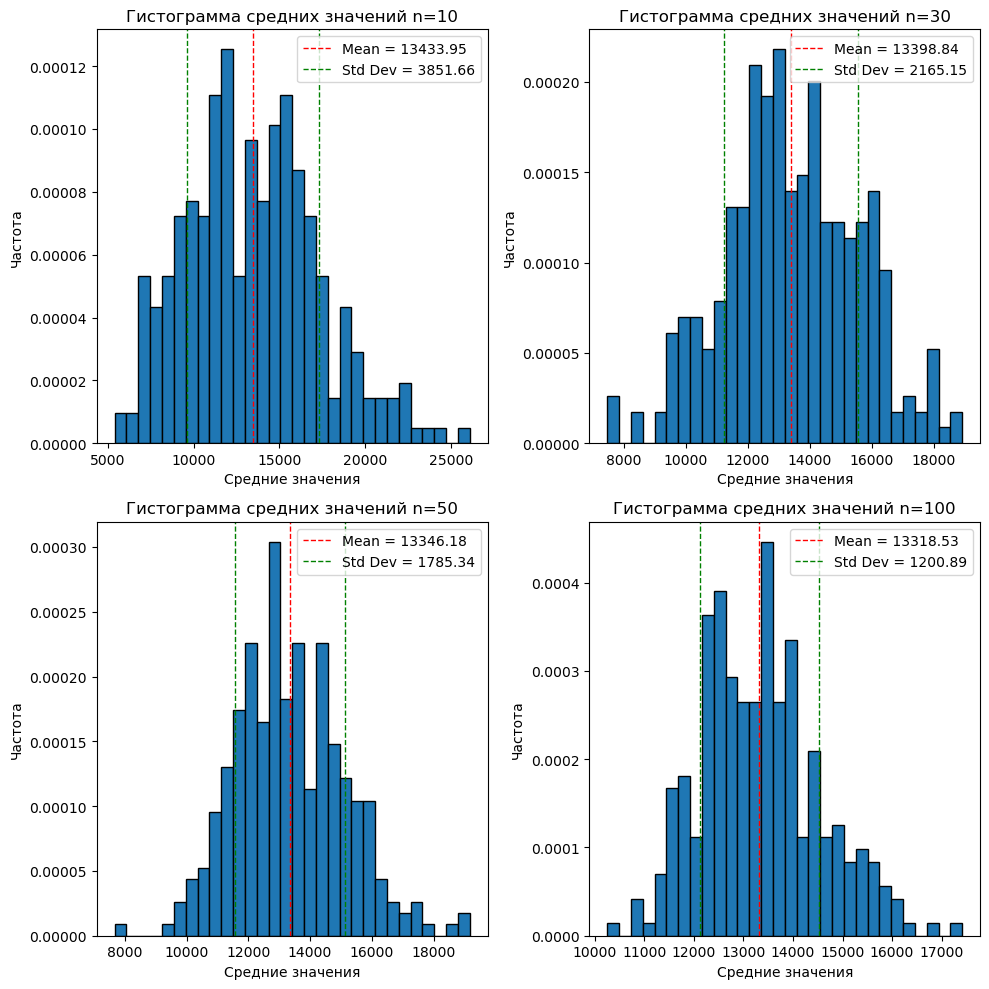

In [8]:
n_samples = 300
sample_sizes = [10, 30, 50, 100]

plt.figure(figsize=(10, 10))
   
for i, size in enumerate(sample_sizes):
    means = []
    for _ in range(n_samples):
        sample = data['charges'].sample(n=size, replace=True)
        means.append(sample.mean())

    m = np.mean(means)
    s = np.std(means)
    
    plt.subplot(2, 2, i + 1)
    plt.hist(means, bins=30, density=True, edgecolor="black")
    plt.axvline(m, color='r', linestyle='dashed', linewidth=1, label=f'Mean = {m:.2f}')
    plt.axvline(m - s, color='g', linestyle='dashed', linewidth=1, label=f'Std Dev = {s:.2f}')
    plt.axvline(m + s, color='g', linestyle='dashed', linewidth=1)
    plt.title(f'Гистограмма средних значений n={size}')
    plt.xlabel('Средние значения')
    plt.ylabel('Частота')
    plt.legend()

plt.tight_layout()
plt.show()

### 7. Доверительные интервалы
Построить 95% и 99% доверительный интервал для среднего значения 
расходов и среднего значения индекса массы тела.

In [9]:
for indicator in ['charges', 'bmi']:
    print(f"Доверительный интервал для {indicator}:")
    
    mean = data[indicator].mean()
    std = data[indicator].std()
    n = len(data[indicator])
    
    se = std / np.sqrt(n)

    for confidence in [0.95, 0.99]:
        z = stats.norm.ppf((1 + confidence) / 2)
        ci = (mean - z * se, mean + z * se)
        print(f"{confidence * 100}%: {ci}")

Доверительный интервал для charges:
95.0%: (12621.54197822916, 13919.302552053354)
99.0%: (12417.649014863586, 14123.195515418927)
Доверительный интервал для bmi:
95.0%: (30.33664297153481, 30.990150750438264)
99.0%: (30.233969458168293, 31.092824263804783)


### 8. Проверка нормальности распределений
Проверить распределения следующих признаков на нормальность: индекс 
массы тела, расходы. Сформулировать нулевую и альтернативную 
гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать 
выводы на основе полученных p-значений.

In [10]:
def normality(p):
    print(f"Распределение {'не ' if p < 0.05 else ''}нормальное.")

KS-test for bmi: statistic=0.026099881197044095, p-value=0.3162798242838347
Распределение нормальное.


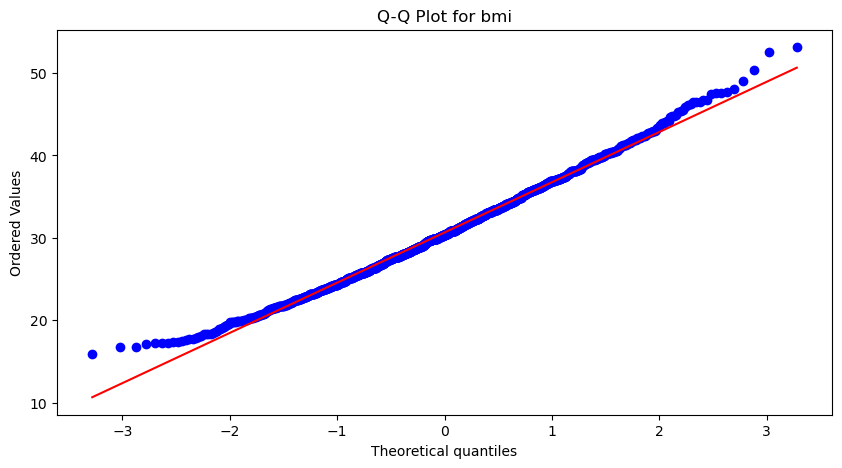

KS-test for charges: statistic=0.18846450965981876, p-value=4.381949677777384e-42
Распределение не нормальное.


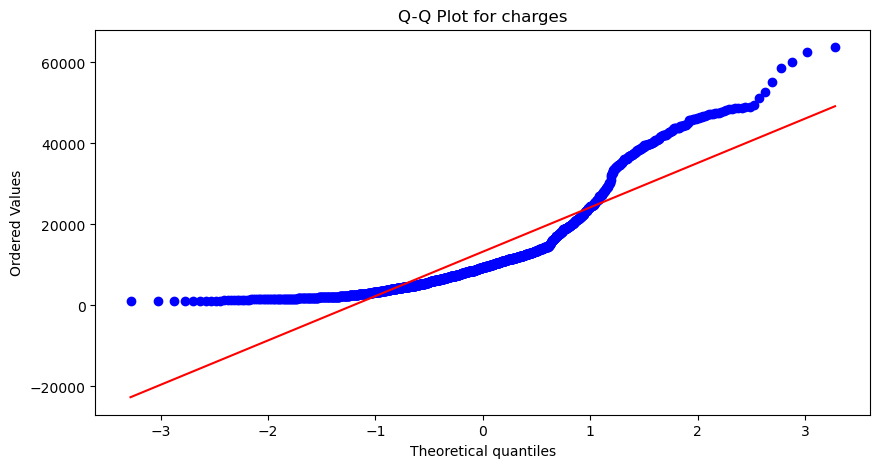

In [11]:
for indicator in ['bmi', 'charges']:
    # KS-тест
    ks = stats.kstest(data[indicator], 'norm', args=(data[indicator].mean(), data[indicator].std()))
    print(f'KS-test for {indicator}: statistic={ks.statistic}, p-value={ks.pvalue}')
    normality(ks.pvalue)

    # Q-Q plot
    plt.figure(figsize=(10, 5))
    stats.probplot(data[indicator], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {indicator}')
    plt.show()

### 9. Загрузка данных
Загрузить данные из файла “ECDCCases.csv”.

In [12]:
data = pd.read_csv('ECDCCases.csv')

display(data)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


### 10. Проверка на наличие пропущенных значений


Проверить в данных наличие пропущенных значений. Вывести 
количество пропущенных значений в процентах.

In [13]:
missing_values = data.isnull().mean() * 100
print(missing_values[missing_values > 0])

geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64


Удалить два признака, в 
которых больше всех пропущенных значений. 

In [14]:
data = data.drop(columns=missing_values.nlargest(2).index)

Для оставшихся признаков 
обработать пропуски: для категориального признака использовать 
заполнение значением по умолчанию (например, «other»), для числового 
признака использовать заполнение медианным значением. 

In [15]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna('other', inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

Показать, что 
пропусков больше в данных нет

In [16]:
data.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

### 11. Статистика по данным и выявление выбросов

Посмотреть статистику по данным, используя describe(). 

In [17]:
description = data.describe()
print(description)

                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  


Сделать выводы 
о том, какие признаки содержат выбросы.

In [18]:
print("Количество выбросов для каждого числового признака:")

Q1 = description.loc['25%']
Q3 = description.loc['75%']
IQR = Q3 - Q1

outlier_condition = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
outliers = outlier_condition.sum()

print(outliers)

Количество выбросов для каждого числового признака:
cases                      10080
continentExp                   0
countriesAndTerritories        0
countryterritoryCode           0
dateRep                        0
day                            0
deaths                     10657
month                          0
popData2019                 6661
year                          67
dtype: int64


C:\Users\tranm\AppData\Local\Temp\ipykernel_25528\1677286658.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_condition = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [19]:
deaths_over_3000 = data[data['deaths'] > 3000]

print(f"Страны с количеством смертей в день более 3000:\n{deaths_over_3000.groupby('countriesAndTerritories').size()}\n")

print(f"Количество дней с смертями более 3000: {len(deaths_over_3000)}")

Страны с количеством смертей в день более 3000:
countriesAndTerritories
Argentina                   1
Ecuador                     1
Mexico                      1
Peru                        2
United_States_of_America    6
dtype: int64

Количество дней с смертями более 3000: 11


### 12. Поиск и удаление дубликатов

Найти дублирование данных. 

In [20]:
data.duplicated().sum()

4

Удалить дубликаты.

In [21]:
data = data.drop_duplicates()

data.duplicated().sum()

0

### 13. bmi.csv

Загрузить данные из файла “bmi.csv”. 

In [22]:
data = pd.read_csv('bmi.csv')

display(data)

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest
...,...,...
645,20.600,southwest
646,38.600,southwest
647,33.400,southwest
648,44.700,southwest


Взять оттуда две выборки. Одна 
выборка – это индекс массы тела людей c региона northwest, вторая 
выборка – это индекс массы тела людей с региона southwest. 

In [23]:
northwest_bmi = data[data['region'] == 'northwest']['bmi']
southwest_bmi = data[data['region'] == 'southwest']['bmi']

Сравнить 
средние значения этих выборок, используя t-критерий Стьюдента. 
Предварительно проверить выборки на нормальность (критерий Шапиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [24]:
northwest_normality = stats.shapiro(northwest_bmi)
southwest_normality = stats.shapiro(southwest_bmi)

print(f'Shapiro-Wilk test for Northwest: Statistic={northwest_normality.statistic}, p-value={northwest_normality.pvalue}')
normality(northwest_normality.pvalue)
        
print(f'Shapiro-Wilk test for Southwest: Statistic={southwest_normality.statistic}, p-value={southwest_normality.pvalue}')
normality(southwest_normality.pvalue)

Shapiro-Wilk test for Northwest: Statistic=0.9954646825790405, p-value=0.4655335247516632
Распределение нормальное.
Shapiro-Wilk test for Southwest: Statistic=0.9949268698692322, p-value=0.3629520535469055
Распределение нормальное.


In [25]:
bartlett_test = stats.bartlett(northwest_bmi, southwest_bmi)
print(f'Bartlett test: Statistic={bartlett_test.statistic}, p-value={bartlett_test.pvalue}')
print(f"Дисперсии выборок {'не ' if bartlett_test.pvalue < 0.05 else 'примерно '}одинаковы.")

Bartlett test: Statistic=3.4000745256463825, p-value=0.06519347353580048
Дисперсии выборок примерно одинаковы.


In [26]:
t_test = stats.ttest_ind(northwest_bmi, southwest_bmi)
print(f'T-test: Statistic={t_test.statistic}, p-value={t_test.pvalue}')

if t_test.pvalue < 0.05:
    print(f"Выборки принадлежат к разным генеральным совокупностям и их средние значения различны.")

T-test: Statistic=-3.2844171500398582, p-value=0.001076958496307695
Выборки принадлежат к разным генеральным совокупностям и их средние значения различны.


### 14. Проверка равномерности распределения

Кубик бросили 600 раз. С помощью критерия Хи-квадрат проверить, является ли полученное 
распределение равномерным. Использовать функцию 
scipy.stats.chisquare().


In [27]:
observed = np.array([97, 98, 109, 95, 97, 104])
attempts = 600

expected = np.array([attempts / len(observed)] * len(observed))

chi = stats.chisquare(observed, expected)

print(f'Критерий Хи-квадрат: {chi}')
print(f"Распределение {'не ' if chi.pvalue < 0.05 else ''}равномерное.")

Критерий Хи-квадрат: Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)
Распределение равномерное.


### 15. Проверка зависимости между переменными


С помощью критерия Хи-квадрат проверить, являются ли переменные 
зависимыми.

Создать датафрейм, используя следующий код: 

In [28]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день',
              'Частичная занятость',
              'Временно не работает',
              'На домохозяйстве',
              'На пенсии',
              'Учёба']

Использовать функцию scipy.stats.chi2_contingency().

Влияет ли семейное положение на занятость?

In [29]:
chi2, pvalue, dof, expected_freq = stats.chi2_contingency(data)

print(f'Хи-квадрат статистика: {chi2}')
print(f'p-значение: {pvalue}')
print(f'Степени свободы: {dof}')
print(f'Ожидаемые частоты: \n{expected_freq}')

print(f"Переменные {'не' if pvalue > 0.05 else ''}зависимы.")

Хи-квадрат статистика: 122.29654948595365
p-значение: 1.7291616900960234e-21
Степени свободы: 10
Ожидаемые частоты: 
[[74.664 68.136 61.2  ]
 [30.378 27.722 24.9  ]
 [24.156 22.044 19.8  ]
 [30.744 28.056 25.2  ]
 [13.176 12.024 10.8  ]
 [ 9.882  9.018  8.1  ]]
Переменные зависимы.


*По значениям можно предположить, что да. Т.к полный рабочий день выбирают те, кто состоит в официальном или
гражданском браке, учеба в основном для людей без отношений, на домохозяйстве те, кто состоит в отношениях.*

### 16. Отчет
Оформить отчет о проделанной работе, написать выводы.